In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/AmesHousing.csv")

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes.value_counts())
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (2930, 82)

Column types:
 object     43
int64      28
float64    11
Name: count, dtype: int64

First 5 rows:
    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1      

In [4]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
              Order           PID  MS SubClass MS Zoning  Lot Frontage  \
count   2930.00000  2.930000e+03  2930.000000      2930   2440.000000   
unique         NaN           NaN          NaN         7           NaN   
top            NaN           NaN          NaN        RL           NaN   
freq           NaN           NaN          NaN      2273           NaN   
mean    1465.50000  7.144645e+08    57.387372       NaN     69.224590   
std      845.96247  1.887308e+08    42.638025       NaN     23.365335   
min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
25%      733.25000  5.284770e+08    20.000000       NaN     58.000000   
50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
75%     2197.75000  9.071811e+08    70.000000       NaN     80.000000   
max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   

             Lot Area Street Alley Lot Shape Land Contour  ...    Pool Area  \
count     2930.000000 

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nTop Missing Values:\n", missing_values.head(10))


Top Missing Values:
 Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Qual       159
Garage Cond       159
Garage Yr Blt     159
dtype: int64


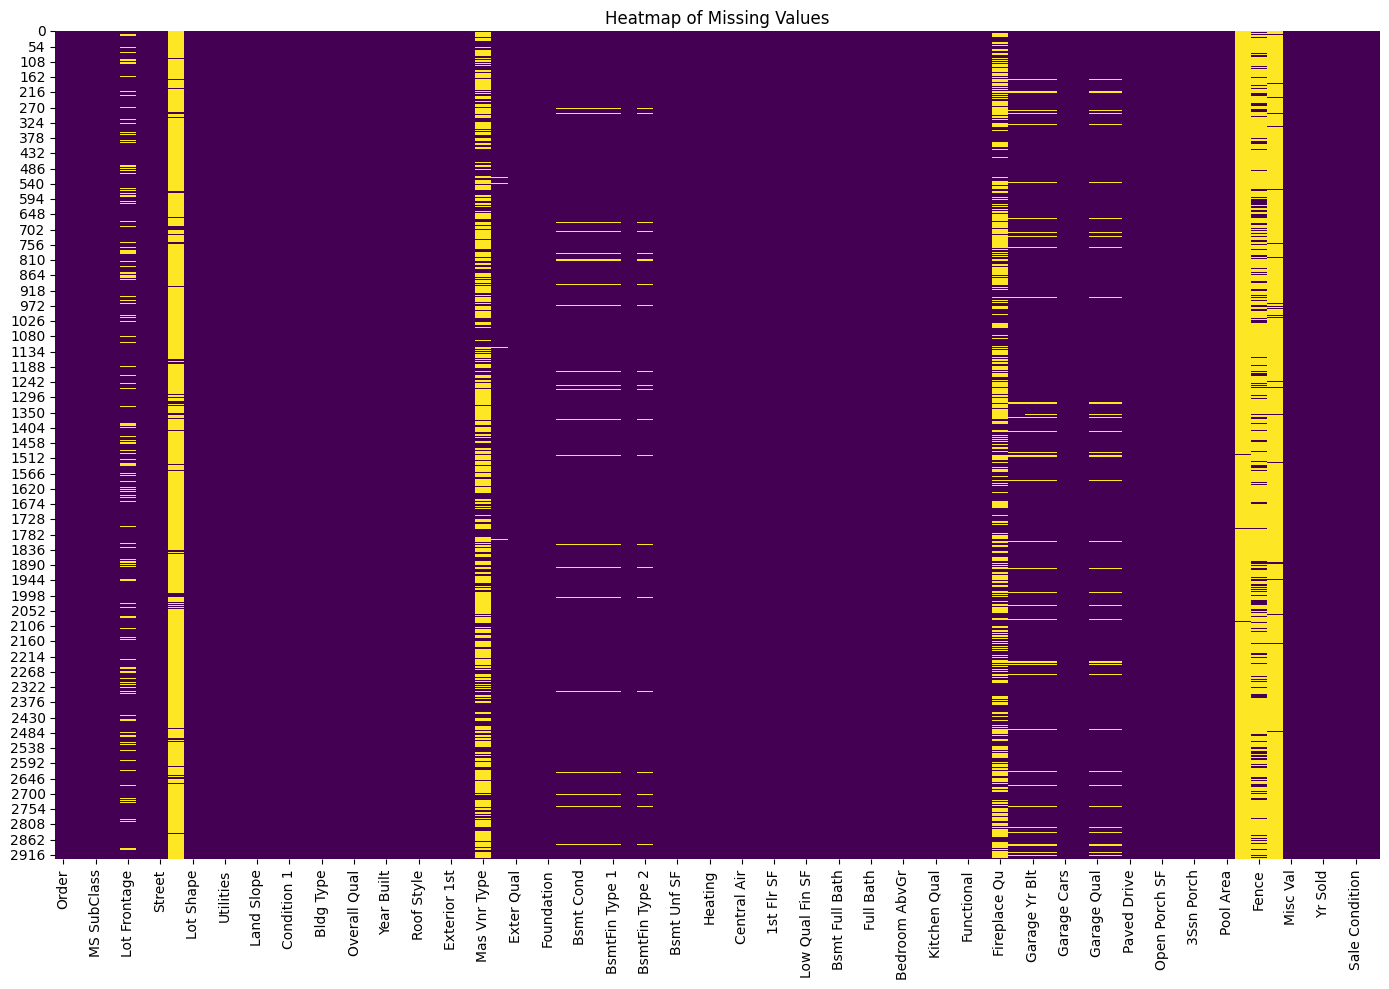

In [6]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.tight_layout()
plt.show()

#Insights from the Missing Values Heatmap
####1. Color Coding: Interpreting Missingness
- Bright Yellow areas indicate missing values in the dataset. A higher concentration of yellow within a column signals a greater proportion of missing entries.

- Dark Purple (or similar dark tone) signifies complete or available data. Columns mostly in dark color have minimal or no missing values.

####2. Spotting Features with High Missing Rates
- Columns heavily shaded in yellow are clear indicators of missing data issues.

- In this dataset, features like Pool QC, Misc Feature, Alley, Fence, and Fireplace Qu clearly show extensive missingness and may require special treatment.

####3. Pattern Analysis: How Missing Data is Distributed
- Random Patterns: Sporadic yellow blocks across rows may suggest missing values occur at random.

- Systematic Patterns: Concentrated yellow in specific rows or columns hints at structured or conditional missingness—often indicating dependencies (e.g., no garage → missing Garage Yr Blt).


####4. Evaluating Impact & Making Decisions

- The extent of missingness should influence how we handle each feature:

- Minimal Missingness: Consider simple imputation (mean, median, mode).

- Moderate Missingness: Impute using models or KNN, or flag with a binary indicator.

- Severe Missingness: For columns like Pool QC, if >90% is missing, consider dropping unless domain knowledge justifies keeping them.

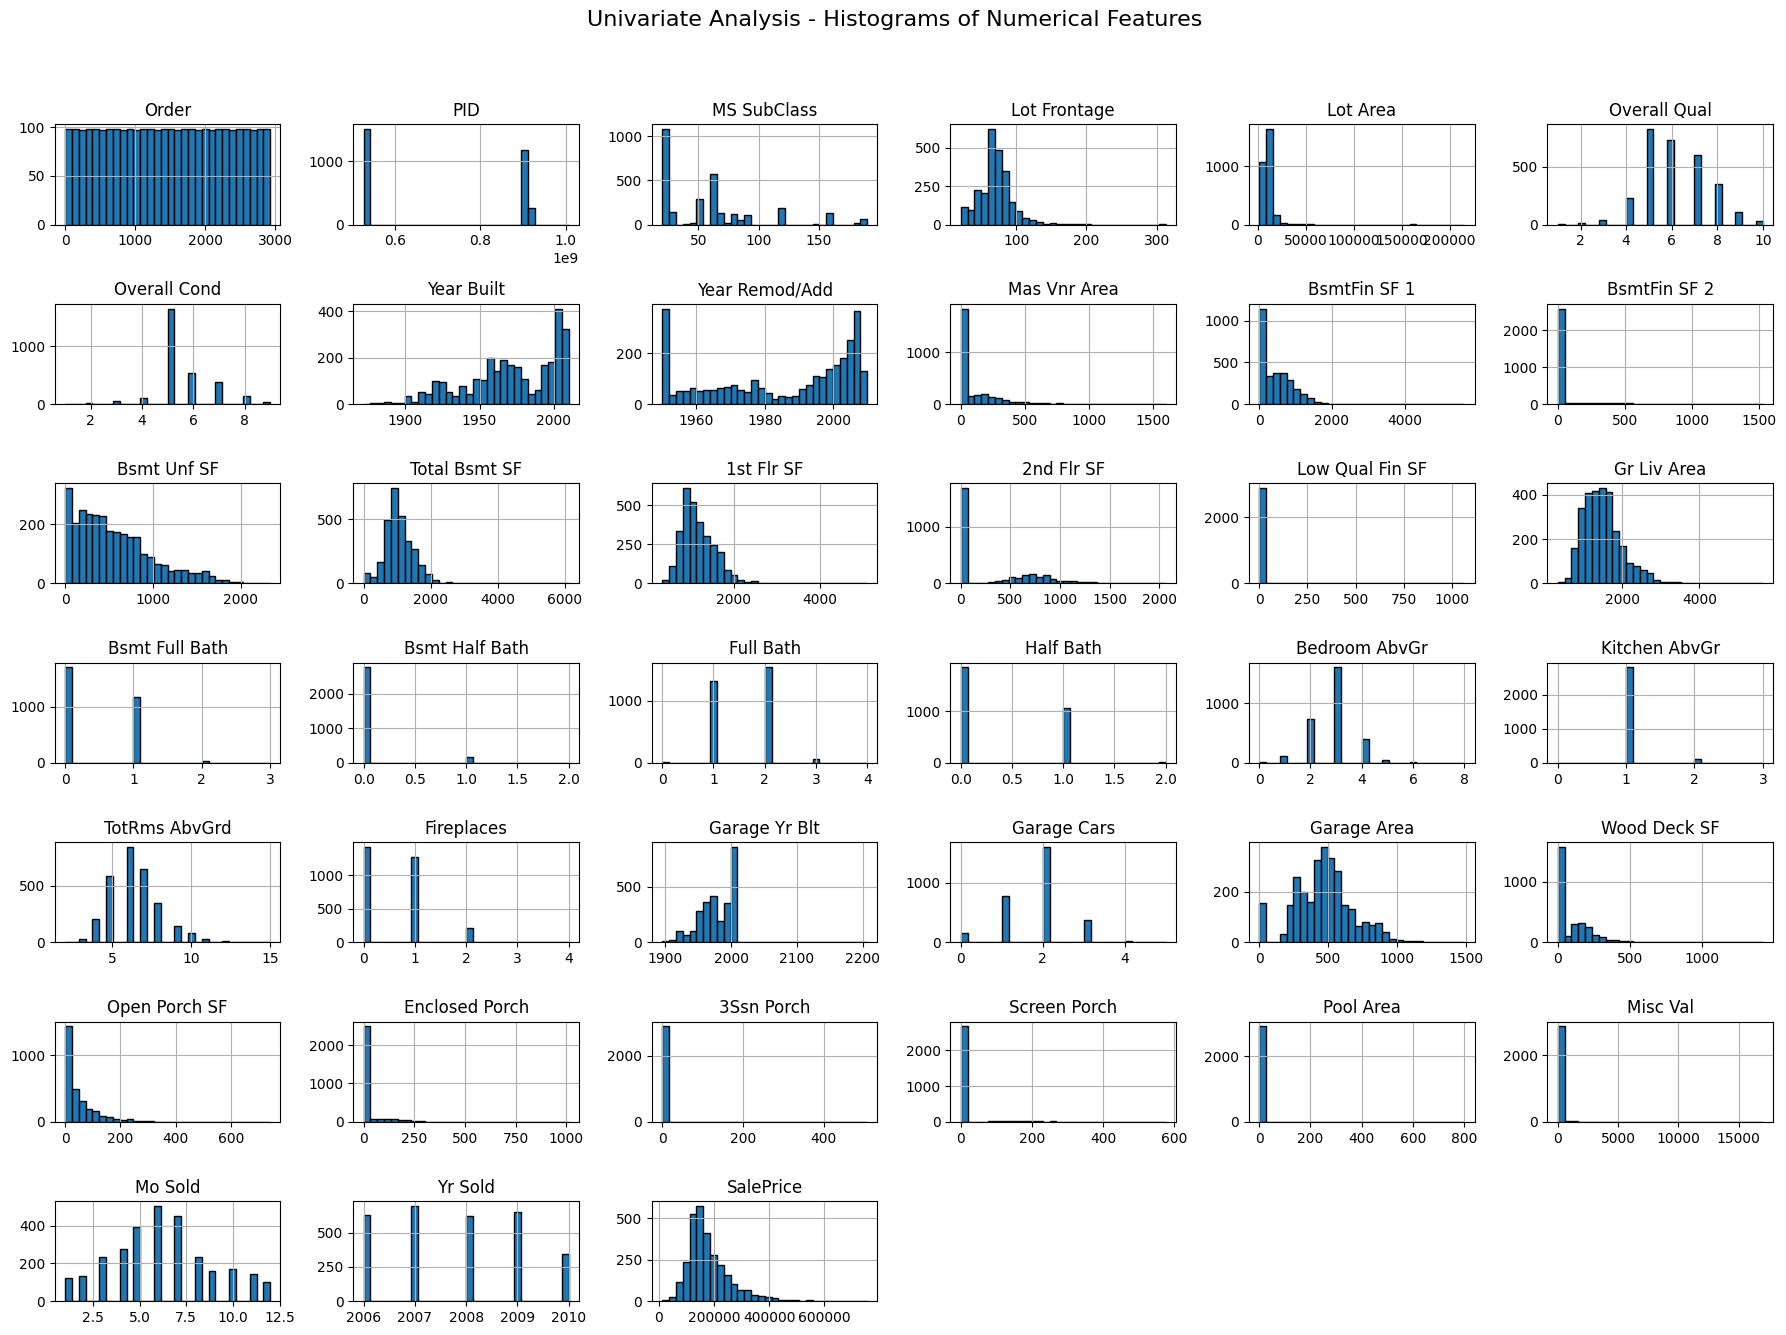

In [7]:
# Univariate Analysis: Histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(18, 14), bins=30, edgecolor='black')
plt.suptitle("Univariate Analysis - Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

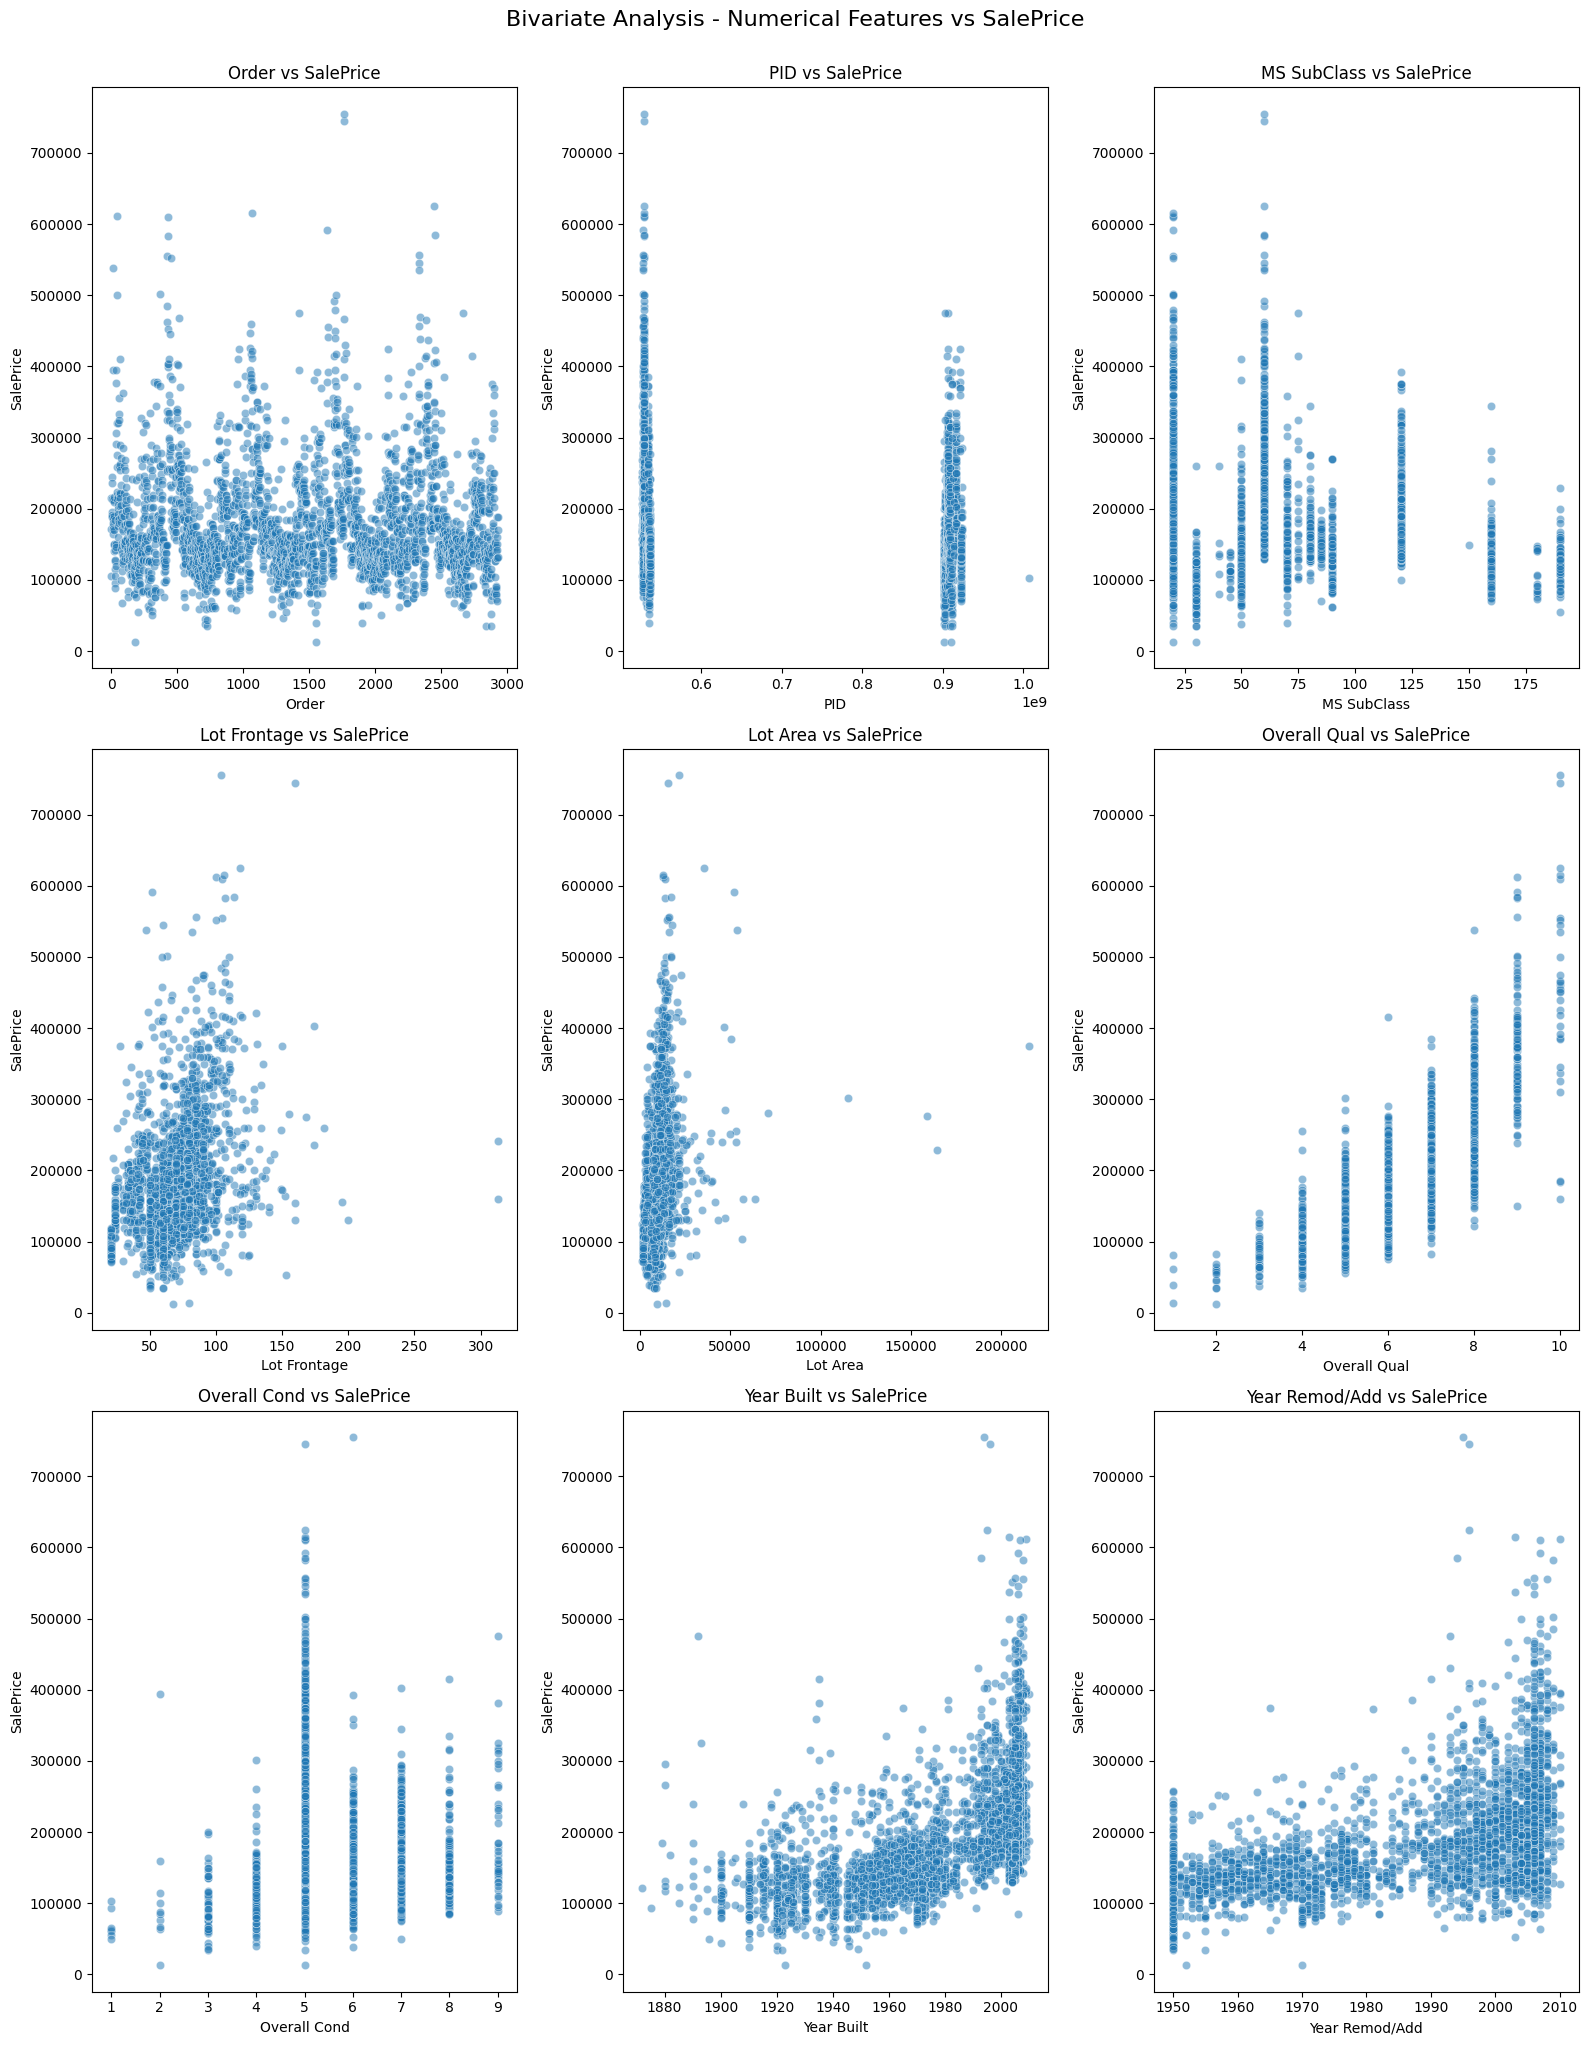

In [10]:
# Bivariate Analysis: Top numerical columns vs SalePrice
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols[:9]):  # Plot top 9 features
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['SalePrice'], alpha=0.5)
    plt.title(f'{col} vs SalePrice')

plt.tight_layout()
plt.suptitle("Bivariate Analysis - Numerical Features vs SalePrice", fontsize=16, y=1.02)
plt.show()

#Insights from Univariate and Bivariate Analysis
---
##Univariate Analysis:
####1. SalePrice Distribution (Target Variable)
- Insight: SalePrice is right-skewed, with most properties priced between $100,000 and $250,000, and a concentration around $160,000 to $200,000.

- Implication: This skewness indicates the presence of high-priced outliers. A log transformation may help normalize the distribution for better performance in linear models.

####2. Lot Area and Gr Liv Area (Numerical Features)
- Insight: Lot Area and Gr Liv Area show strong right-skew with extreme high values. Most homes have living areas under 2500 sqft, and lot areas under 15,000 sqft.

- Implication: Outliers (large properties) may disproportionately influence models. Consider scaling, binning, or outlier treatment.

####3. Garage Cars and Full Bath (Numerical Features)

- Insight: These features show clear peaks: most homes have 2-car garages and 1-2 full bathrooms, indicating consistency in mid-range housing.

- Implication: These modal values can serve as strong baseline indicators for common home configurations.




## Bivariate Analysis:
####1. Gr Liv Area vs. SalePrice

- Insight: A strong positive linear relationship is observed — as Gr Liv Area increases, so does SalePrice. A few large homes have surprisingly low sale prices (outliers).

- Implication: Gr Liv Area is a highly predictive feature for price. Investigate outliers to avoid distortion during model training.

####2. Overall Qual vs. SalePrice

- Insight: Overall Qual is strongly correlated with SalePrice. Each step increase in quality generally leads to a sharp rise in price.

- Implication: A crucial categorical predictor. Consider using it as-is or encoded numerically. Variance within each quality level may be explained by other features like location.

####3. Garage Area / 1st Flr SF vs. SalePrice

- Insight: Moderate positive trends are seen with Garage Area and 1st Flr SF, though the relationship is not as strong as Gr Liv Area.

- Implication: These features contribute meaningfully to sale price but may interact with others (e.g., basement size or year built).

##Summary
- Key Predictors: Gr Liv Area and Overall Qual consistently show the strongest influence on house prices.

- Skewed Distributions: Features like SalePrice, Lot Area, and Gr Liv Area may require log scaling or winsorizing due to right skew and outliers.

- Feature Engineering Targets: Room count, garage size, and quality indicators should be prioritized for encoding and modeling.

- Next Steps: Examine categorical variables, deal with missing values, and build a correlation heatmap to validate assumptions.

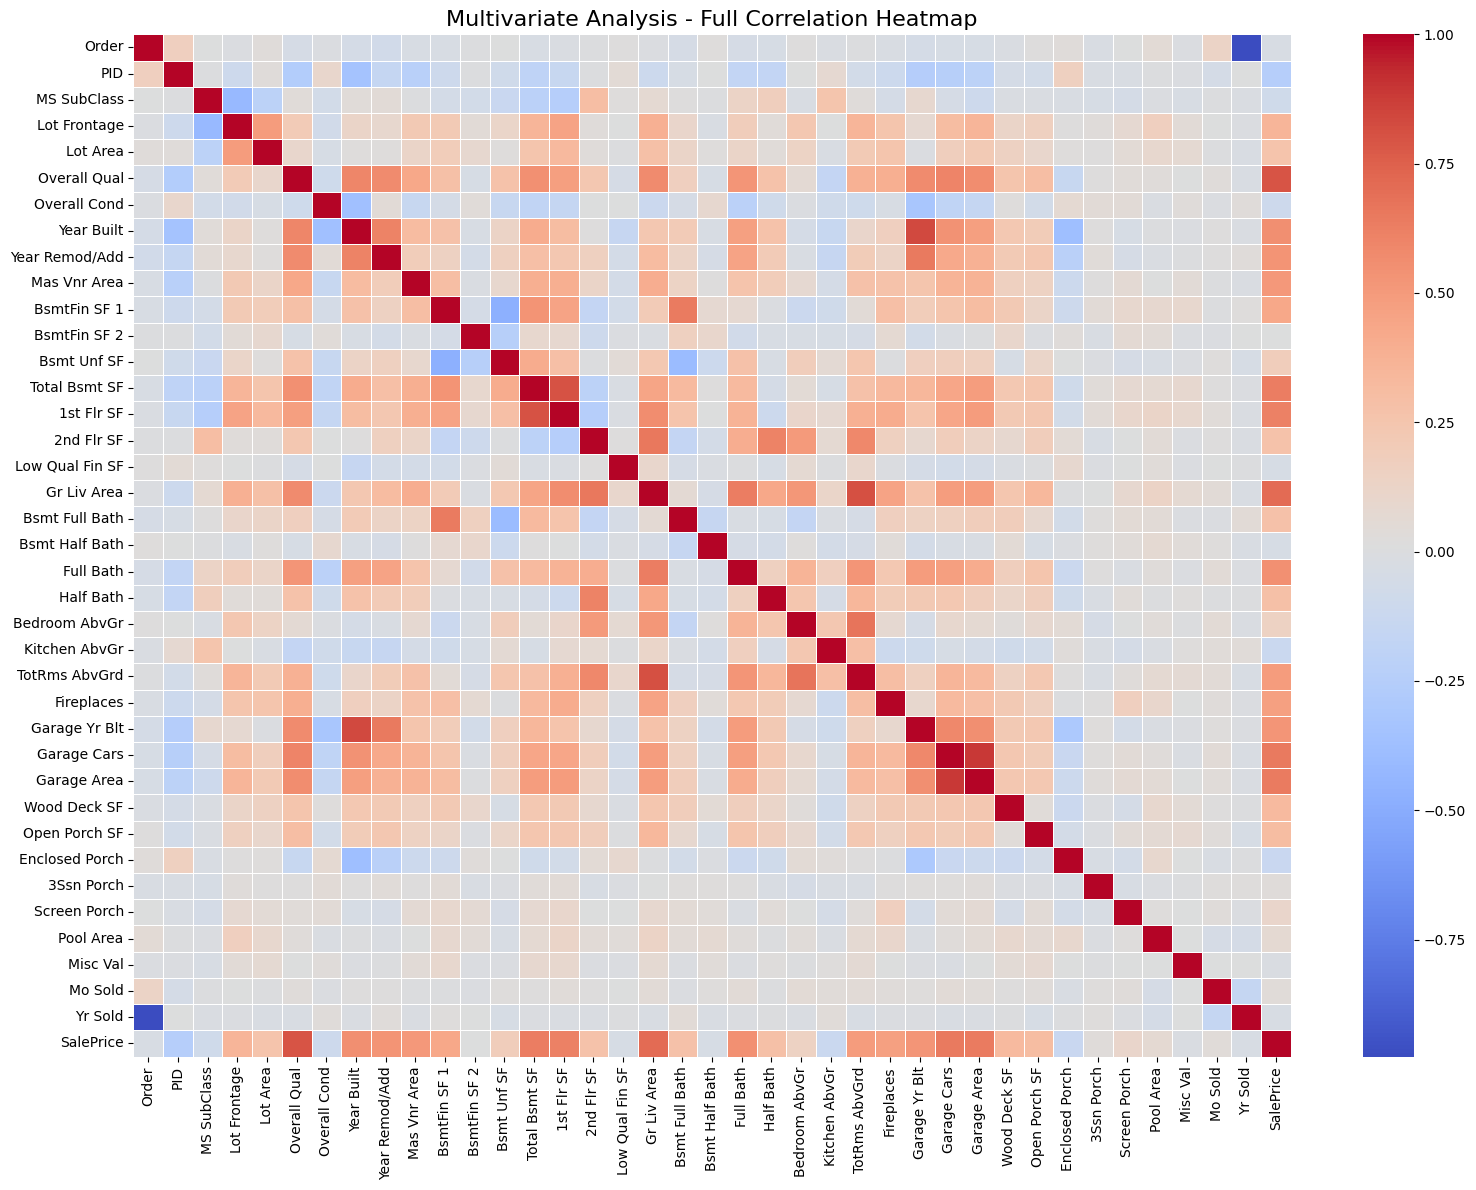

In [12]:
# Compute correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Multivariate Analysis - Full Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

🔝 Top Features Most Correlated with SalePrice:

Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64


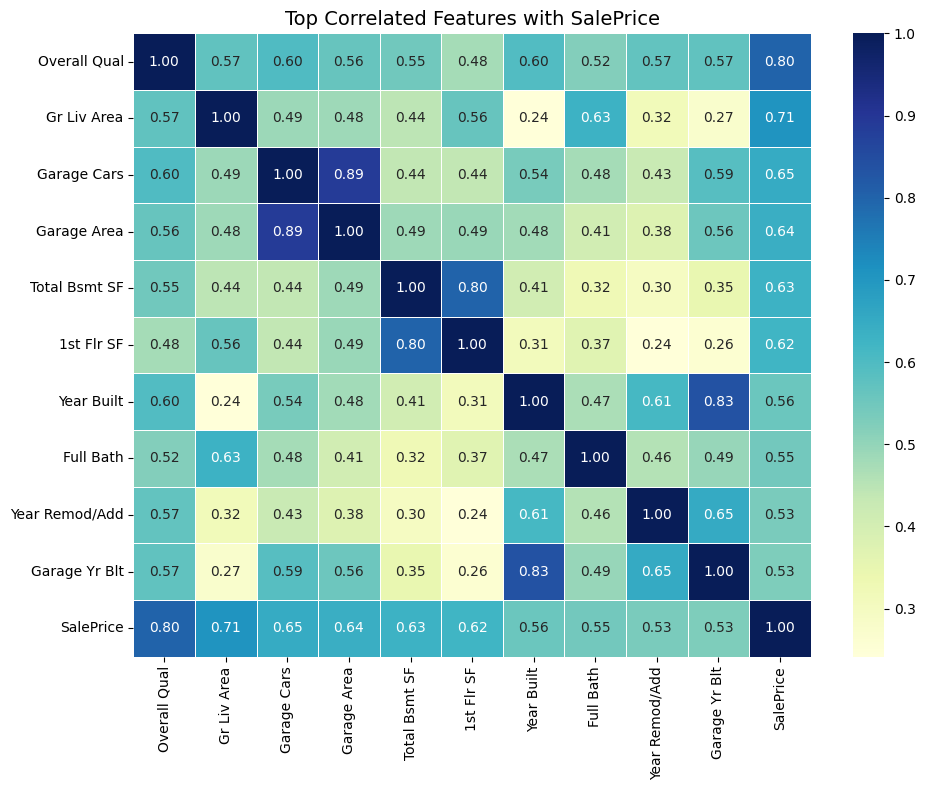

In [15]:
top_corr = corr_matrix["SalePrice"].sort_values(ascending=False).head(11)
top_corr = top_corr.drop("SalePrice")

print("🔝 Top Features Most Correlated with SalePrice:\n")
print(top_corr)

# Focused heatmap of top correlated features
top_features = top_corr.index.tolist() + ["SalePrice"]
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Top Correlated Features with SalePrice", fontsize=14)
plt.tight_layout()
plt.show()

#Insights from Multivariate Analysis
###Correlation Heatmap
####1. SalePrice and Overall Qual

- Insight: Overall Qual has the strongest correlation with SalePrice (0.80), indicating that perceived quality of construction and materials significantly affects property value.

- Implication: This feature is a top-tier predictor. It should be prioritized during model training, possibly treated as ordinal categorical for better interpretation.

####2. SalePrice and Gr Liv Area

- Insight: Gr Liv Area shows a strong positive correlation with SalePrice (0.71), confirming that more above-ground living space typically leads to higher prices.

- Implication: This is a key numerical feature for modeling. A linear relationship makes it suitable for linear regression models.

####3. SalePrice and Garage Features (Garage Cars & Garage Area)

- Insight: Garage Cars (0.65) and Garage Area (0.64) both correlate strongly with SalePrice. Homes with more garage space are generally priced higher.

- Implication: These features capture utility and luxury, and should be included in the predictive model. Beware of collinearity between them.

####4. SalePrice and Total Bsmt SF

- Insight: A correlation of 0.63 with SalePrice shows that the basement size also contributes significantly to home value.

- Implication: While important, the basement's influence may depend on whether it's finished — consider combining with basement finish quality features.

####4. SalePrice and Year Built / Year Remod/Add

- Insight: Newer or recently remodeled houses are priced higher (Year Built: 0.56, Year Remod/Add: 0.53).

- Implication: These time-based features can capture modernization effects and should be carefully included.

🔍 Outlier Counts (IQR Method):
SalePrice: 137 outliers
Gr Liv Area: 75 outliers
Total Bsmt SF: 123 outliers
Garage Area: 42 outliers
Lot Area: 127 outliers


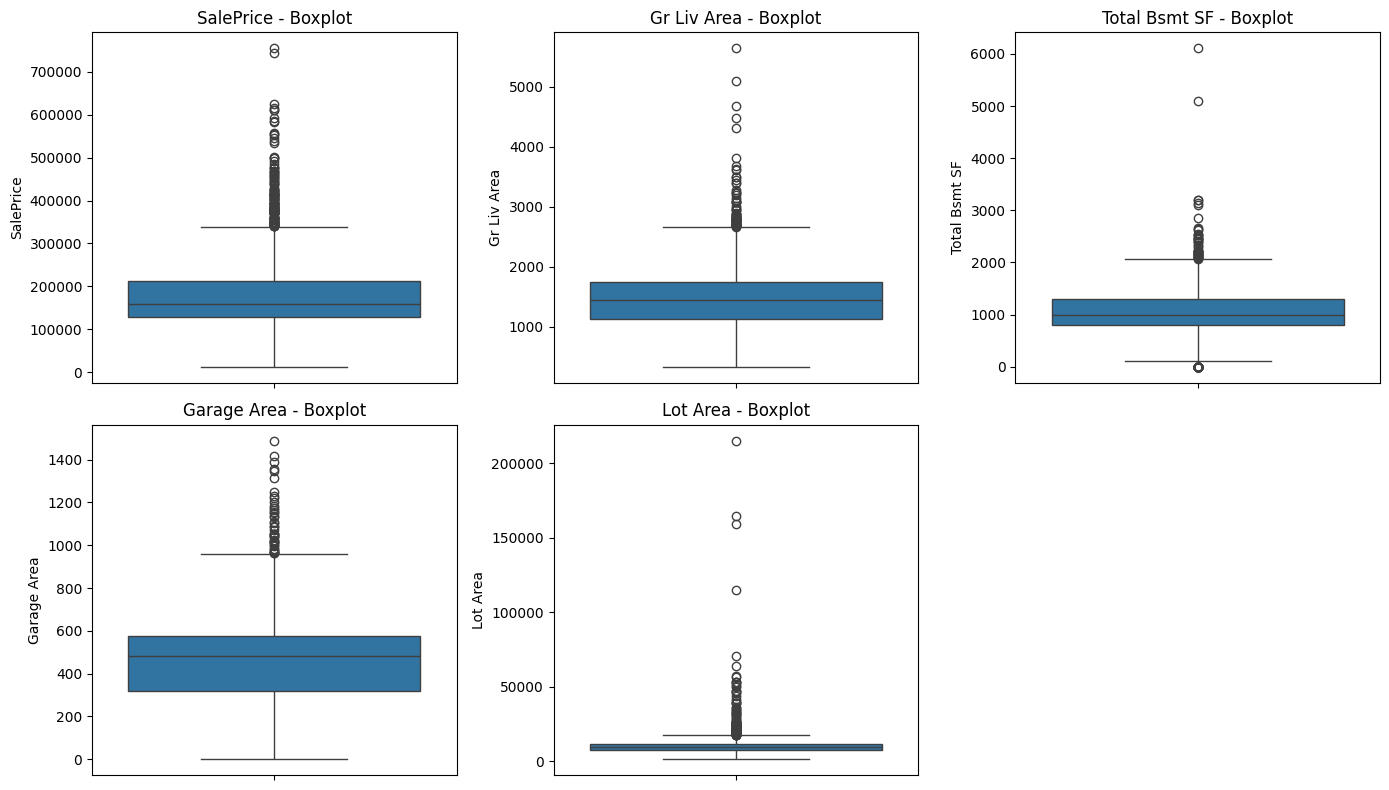

In [16]:
# Define key numerical features to check for outliers
features_to_check = ["SalePrice", "Gr Liv Area", "Total Bsmt SF", "Garage Area", "Lot Area"]

# IQR-based outlier detection function
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Count outliers per feature
outlier_summary = {}
for col in features_to_check:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

# Print outlier summary
print("🔍 Outlier Counts (IQR Method):")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count} outliers")

# Boxplots to visualize outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(features_to_check):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

# Boxplot Observations (Visual Insights)
###1. SalePrice

- The boxplot reveals a long right tail, with numerous properties exceeding $400,000.

- These are potential high-leverage points in modeling — may need log transformation or segmented modeling for luxury segment.

###2. Gr Liv Area

- Homes over ~4000 sqft are considered outliers.

- Most data falls below 2500 sqft, so these large homes may distort regression coefficients if left untreated.

###3. Total Bsmt SF

- Outliers typically represent large, finished basements, which may or may not correlate with actual usable living space.

- Feature interaction with Bsmt Qual and Finished SF could help explain their pricing impact.

###4. Garage Area

- Most garages are 400–800 sqft (2–3 cars).

- Outliers above 1000 sqft might include detached garages or custom builds, worth exploring in Garage Type.

###5. Lot Area

- Highly skewed; several large lots go beyond 20,000 sqft.

- These can represent acreage properties or outlier zoning cases — check if they're skewing location-based pricing models.